In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from itertools import combinations

In [27]:
ffile = np.array(open('./words_250000_train.txt').readlines())
len(ffile)
indx = np.random.choice(range(len(ffile)),size=1000)

with open('./play_set.txt',mode='w') as filep:
     with open('./trainin_set.txt', mode='w') as filet:
          for i in range(len(ffile)):
               if(i in indx):
                    filep.write(ffile[i])
               else:
                    filet.write(ffile[i])

In [2]:
data = pd.read_csv('./trainin_set.txt',header=None,names=['words'])
engletters = np.array([ s for s in 'abcdefghijklmnopqrstuvwxyz'])
data['length'] = data['words'].str.len()

In [3]:
def distribution(n):
    freqs = {}
    freqs_vec = np.zeros(len(engletters))
    words = data['words'][data['lenght']==n]
    N = len(words)
    for i,l in enumerate(engletters):
        freqs[l] = sum(words.str.contains(l))/N
        freqs_vec[i] = freqs[l]
    return freqs, freqs_vec

Computing the entropies.

We want to determine what letter has the highest entropy for it to be our initial guess.

In [4]:
import importlib as il
import with_NN as nn

In [5]:
il.reload(nn)

<module 'with_NN' from '/Users/tingua/Documents/Quant Preparation/TraxQuantChallenge/with_NN.py'>

In [6]:
def is_pattern(sep_word, let, pattern):
    pos = ''.join(['0' if aa!=let else '1' for aa in sep_word])
    return pos==pattern

def get_pattern(sep_word, let):
    pos = ''.join(['0' if aa!=let else '1' for aa in sep_word])
    return pos

In [7]:
def surprice(x):
    if(x!=0):
        return x*np.log2(1/x)
    else:
        return 0

In [48]:
def guess(game):
    wo = game.game_status()
    L = len(wo)
    w2 = data[data['length']==L]
    w2['word_sep'] = [list(w) for w in w2['words']]
    w2_l = w2.copy()
    av_letters = engletters.copy()
    found_patters = {}
    base = list('0'*L)
    probabilities = {}
    
    # Determine letter probabilities
    prob_let = {}
    for a in 
    GO = False
    for i in range(L+1):
        combs = combinations(range(L),i)
        for c in list(combs):
            b = ''.join(['1' if j in c else '0' for j in range(L)])
            probabilities[b] = 0
    
    while(not(GO)):
        print(GO)
        print(w2.head())
        print(len(w2))
        if(len(w2)>=1):
            PT = []
            H = []
            cnt = 0
            for l in av_letters:
                PT.append(probabilities.copy())
                for a in w2['word_sep']:
                    pos = ''.join(['0' if aa!=l else '1' for aa in a])
                    PT[cnt][pos]+=1/len(w2)
                H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
                cnt += 1

            #plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])
            #plt.show()
            #plt.close()
            let = av_letters[np.argmax(H)]
            print('I am guessing '+let)
            GO = game.guess(let)
            found_patters[let] = get_pattern(game.output,let)
            av_letters = np.delete(av_letters,np.where(av_letters==let)[0])
            w2 = w2[[is_pattern(aa,let,found_patters[let]) for aa in w2['word_sep']]]
        else:
            if(len(w2)!=0):
                print('I have only one guess')
                letters = np.intersect1d(list(w2['word_sep'])[0],av_letters)
                if(len(letters)!=0):
                    for let in letters:
                        print('I am guessin '+let)
                        GO = game.guess(let)
                        found_patters[let] = get_pattern(game.output,let)
                        av_letters = np.delete(av_letters,np.where(av_letters==let)[0])
                else:
                    let = np.random.choice(av_letters,size=1)[0]
                    print(let)
                    print('Random guessing, no av words '+let)
                    GO = game.guess(let)
                    found_patters[let] = get_pattern(game.output,let)
                    av_letters = np.delete(av_letters,np.where(av_letters==let)[0])
            else:
                let = np.random.choice(av_letters,size=1)[0]
                print('I am random guessing '+let)
                GO = game.guess(let)
                found_patters[let] = get_pattern(game.output,let)
                av_letters = np.delete(av_letters,np.where(av_letters==let)[0])
                    

    print('finished guess')
        
    


In [59]:
game = nn.Hangman_Game()

capillament


In [60]:
guess(game)

/var/folders/rt/wpv5xnpx15s03bkwk5kmkw740000gn/T/ipykernel_80384/1842892746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2['word_sep'] = [list(w) for w in w2['words']]


False
          words  length                           word_sep
38  abacination    11.0  [a, b, a, c, i, n, a, t, i, o, n]
58  abalienated    11.0  [a, b, a, l, i, e, n, a, t, e, d]
68  abandonment    11.0  [a, b, a, n, d, o, n, m, e, n, t]
76  abarticular    11.0  [a, b, a, r, t, i, c, u, l, a, r]
84  abashedness    11.0  [a, b, a, s, h, e, d, n, e, s, s]
22684
I am guessing e
||||||
_ _ _ _ _ _ _ _ e _ _
False
            words  length                           word_sep
68    abandonment    11.0  [a, b, a, n, d, o, n, m, e, n, t]
620   abstractest    11.0  [a, b, s, t, r, a, c, t, e, s, t]
971   accountment    11.0  [a, c, c, o, u, n, t, m, e, n, t]
1971  addictively    11.0  [a, d, d, i, c, t, i, v, e, l, y]
2294  administerd    11.0  [a, d, m, i, n, i, s, t, e, r, d]
677
I am guessing n
||||||
_ _ _ _ _ _ _ _ e n _
False
             words  length                           word_sep
3436   aggroupment    11.0  [a, g, g, r, o, u, p, m, e, n, t]
6617   amphisbaena    11.0  [a, m, p, 

In [50]:
av_letters = engletters.copy()
found_patters = {}
L = 10
w2 = data[data['length']==L]
w2['word_sep'] = [list(w) for w in w2['words']]
base = list('0'*L)
probabilities = {}

/var/folders/rt/wpv5xnpx15s03bkwk5kmkw740000gn/T/ipykernel_77923/3251927505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2['word_sep'] = [list(w) for w in w2['words']]


In [54]:
list(w2['word_sep'])[0]

['a', 'a', 'r', 'o', 'n', 's', 'b', 'u', 'r', 'g']

/var/folders/rt/wpv5xnpx15s03bkwk5kmkw740000gn/T/ipykernel_70066/1530213760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2['word_sep'] = [list(w) for w in w2['words']]


<BarContainer object of 26 artists>

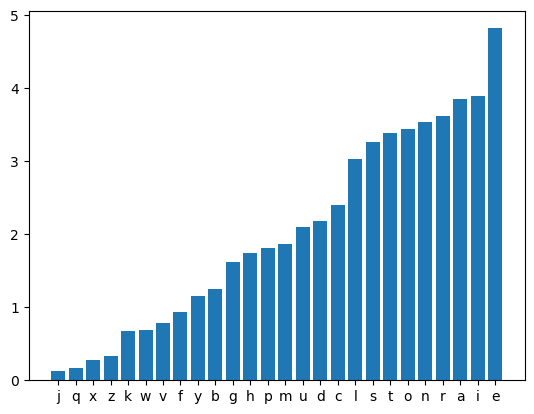

In [146]:
av_letters = engletters.copy()
found_patters = {}
L = 10
w2 = data[data['length']==L]
w2['word_sep'] = [list(w) for w in w2['words']]
base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0



In [147]:
w2

,words,length,word_sep
25,aaronsburg,10,"[a, a, r, o, n, s, b, u, r, g]"
42,abacterial,10,"[a, b, a, c, t, e, r, i, a, l]"
68,abandoners,10,"[a, b, a, n, d, o, n, e, r, s]"
74,abaptiston,10,"[a, b, a, p, t, i, s, t, o, n]"
80,abasedness,10,"[a, b, a, s, e, d, n, e, s, s]"
...,...,...,...
227259,zygotactic,10,"[z, y, g, o, t, a, c, t, i, c]"
227264,zygotomere,10,"[z, y, g, o, t, o, m, e, r, e]"
227273,zymogenous,10,"[z, y, m, o, g, e, n, o, u, s]"
227277,zymologist,10,"[z, y, m, o, l, o, g, i, s, t]"


In [148]:
last_lett = 'e'
found_patters[last_lett]='0000010000'
w2

,words,length,word_sep
25,aaronsburg,10,"[a, a, r, o, n, s, b, u, r, g]"
42,abacterial,10,"[a, b, a, c, t, e, r, i, a, l]"
68,abandoners,10,"[a, b, a, n, d, o, n, e, r, s]"
74,abaptiston,10,"[a, b, a, p, t, i, s, t, o, n]"
80,abasedness,10,"[a, b, a, s, e, d, n, e, s, s]"
...,...,...,...
227259,zygotactic,10,"[z, y, g, o, t, a, c, t, i, c]"
227264,zygotomere,10,"[z, y, g, o, t, o, m, e, r, e]"
227273,zymogenous,10,"[z, y, m, o, g, e, n, o, u, s]"
227277,zymologist,10,"[z, y, m, o, l, o, g, i, s, t]"


<BarContainer object of 26 artists>

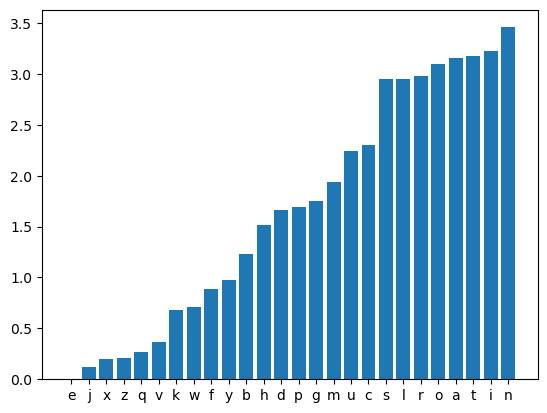

In [149]:


base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [150]:
last_lett='n'
found_patters[last_lett]='0000000000'
w2_1

,words,length,word_sep
42,abacterial,10,"[a, b, a, c, t, e, r, i, a, l]"
284,abiogenist,10,"[a, b, i, o, g, e, n, i, s, t]"
791,acarpelous,10,"[a, c, a, r, p, e, l, o, u, s]"
879,accidental,10,"[a, c, c, i, d, e, n, t, a, l]"
885,accidently,10,"[a, c, c, i, d, e, n, t, l, y]"
...,...,...,...
227098,zoospermia,10,"[z, o, o, s, p, e, r, m, i, a]"
227111,zoothecial,10,"[z, o, o, t, h, e, c, i, a, l]"
227205,zwitterion,10,"[z, w, i, t, t, e, r, i, o, n]"
227273,zymogenous,10,"[z, y, m, o, g, e, n, o, u, s]"


<BarContainer object of 25 artists>

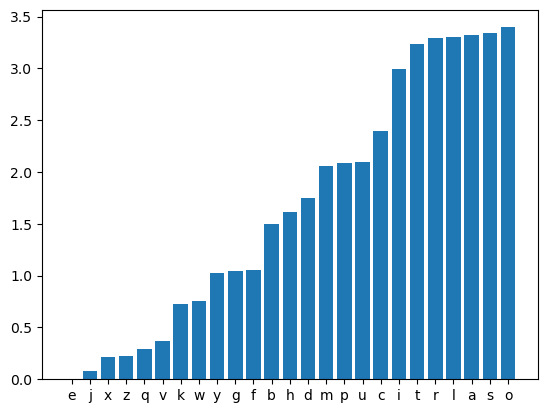

In [151]:
av_letters = np.delete(engletters,np.where(engletters==last_lett)[0])

w2_1 = w2_1[[is_pattern(aa,last_lett,found_patters[last_lett]) for aa in w2_1['word_sep']]]

base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [152]:
last_lett = 'o'
found_patters[last_lett] = '0000000100'
w2_1

,words,length,word_sep
42,abacterial,10,"[a, b, a, c, t, e, r, i, a, l]"
791,acarpelous,10,"[a, c, a, r, p, e, l, o, u, s]"
1617,acromegaly,10,"[a, c, r, o, m, e, g, a, l, y]"
1674,acroterium,10,"[a, c, r, o, t, e, r, i, u, m]"
1882,adagiettos,10,"[a, d, a, g, i, e, t, t, o, s]"
...,...,...,...
222765,whitterick,10,"[w, h, i, t, t, e, r, i, c, k]"
223071,wiggletail,10,"[w, i, g, g, l, e, t, a, i, l]"
223217,willlessly,10,"[w, i, l, l, l, e, s, s, l, y]"
227098,zoospermia,10,"[z, o, o, s, p, e, r, m, i, a]"


<BarContainer object of 25 artists>

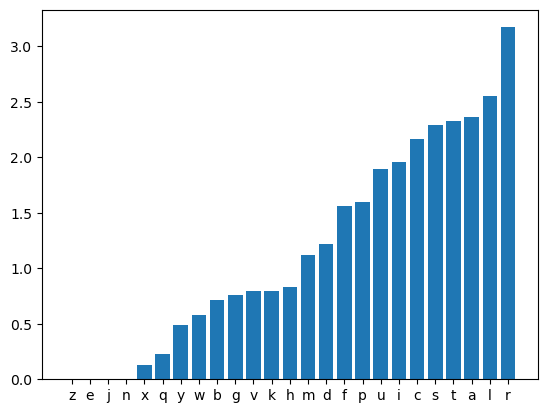

In [153]:
av_letters = np.delete(engletters,np.where(engletters==last_lett)[0])

w2_1 = w2_1[[is_pattern(aa,last_lett,found_patters[last_lett]) for aa in w2_1['word_sep']]]

base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [154]:
last_lett = 'r'
found_patters[last_lett] = '0000001000'
w2_1

,words,length,word_sep
791,acarpelous,10,"[a, c, a, r, p, e, l, o, u, s]"
6045,ambilevous,10,"[a, m, b, i, l, e, v, o, u, s]"
11243,arciferous,10,"[a, r, c, i, f, e, r, o, u, s]"
12377,asciferous,10,"[a, s, c, i, f, e, r, o, u, s]"
13922,aurigerous,10,"[a, u, r, i, g, e, r, o, u, s]"
20267,biliferous,10,"[b, i, l, i, f, e, r, o, u, s]"
25208,bruisewort,10,"[b, r, u, i, s, e, w, o, r, t]"
26976,cadaverous,10,"[c, a, d, a, v, e, r, o, u, s]"
30253,cattlefold,10,"[c, a, t, t, l, e, f, o, l, d]"
32063,charlevoix,10,"[c, h, a, r, l, e, v, o, i, x]"


<BarContainer object of 25 artists>

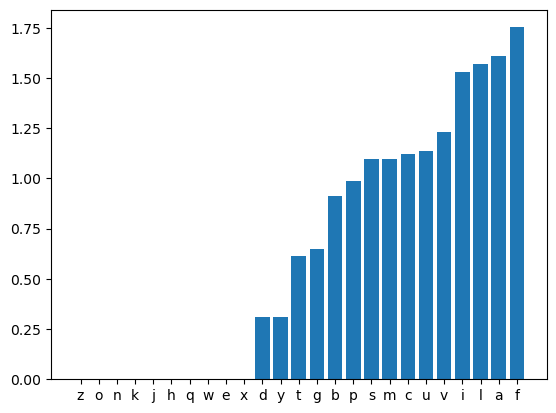

In [155]:
av_letters = np.delete(engletters,np.where(engletters==last_lett)[0])

w2_1 = w2_1[[is_pattern(aa,last_lett,found_patters[last_lett]) for aa in w2_1['word_sep']]]

base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [156]:
last_lett = 'f'
found_patters[last_lett] = '0000100000'
w2_1

,words,length,word_sep
12377,asciferous,10,"[a, s, c, i, f, e, r, o, u, s]"
20267,biliferous,10,"[b, i, l, i, f, e, r, o, u, s]"
26976,cadaverous,10,"[c, a, d, a, v, e, r, o, u, s]"
45296,cymiferous,10,"[c, y, m, i, f, e, r, o, u, s]"
67410,filiferous,10,"[f, i, l, i, f, e, r, o, u, s]"
67412,filigerous,10,"[f, i, l, i, g, e, r, o, u, s]"
68440,flatterous,10,"[f, l, a, t, t, e, r, o, u, s]"
72241,fumiferous,10,"[f, u, m, i, f, e, r, o, u, s]"
107314,luciferous,10,"[l, u, c, i, f, e, r, o, u, s]"
118775,muciferous,10,"[m, u, c, i, f, e, r, o, u, s]"


<BarContainer object of 25 artists>

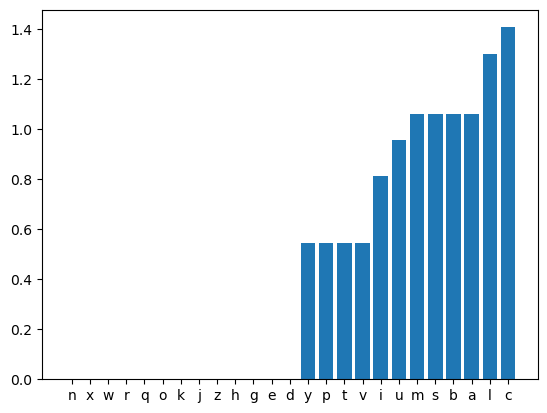

In [157]:
av_letters = np.delete(engletters,np.where(engletters==last_lett)[0])

w2_1 = w2_1[[is_pattern(aa,last_lett,found_patters[last_lett]) for aa in w2_1['word_sep']]]

base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [158]:
last_lett = 'c'
found_patters[last_lett] = '0000000000'
w2_1

,words,length,word_sep
12377,asciferous,10,"[a, s, c, i, f, e, r, o, u, s]"
20267,biliferous,10,"[b, i, l, i, f, e, r, o, u, s]"
45296,cymiferous,10,"[c, y, m, i, f, e, r, o, u, s]"
107314,luciferous,10,"[l, u, c, i, f, e, r, o, u, s]"
118775,muciferous,10,"[m, u, c, i, f, e, r, o, u, s]"
143630,piliferous,10,"[p, i, l, i, f, e, r, o, u, s]"
202788,tubiferous,10,"[t, u, b, i, f, e, r, o, u, s]"
216941,vasiferous,10,"[v, a, s, i, f, e, r, o, u, s]"


<BarContainer object of 25 artists>

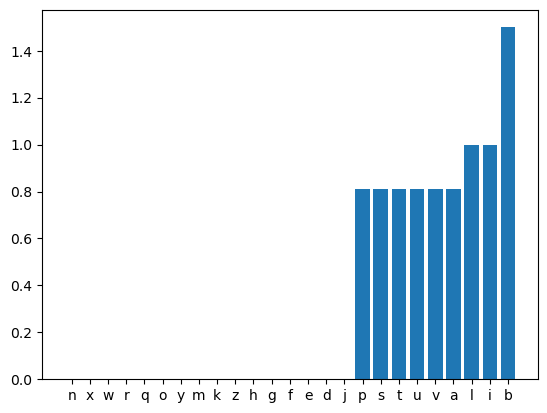

In [159]:
av_letters = np.delete(engletters,np.where(engletters==last_lett)[0])

w2_1 = w2_1[[is_pattern(aa,last_lett,found_patters[last_lett]) for aa in w2_1['word_sep']]]

base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [160]:
last_lett = 'b'
found_patters[last_lett] = '0000000000'
w2_1

,words,length,word_sep
20267,biliferous,10,"[b, i, l, i, f, e, r, o, u, s]"
143630,piliferous,10,"[p, i, l, i, f, e, r, o, u, s]"
202788,tubiferous,10,"[t, u, b, i, f, e, r, o, u, s]"
216941,vasiferous,10,"[v, a, s, i, f, e, r, o, u, s]"


<BarContainer object of 25 artists>

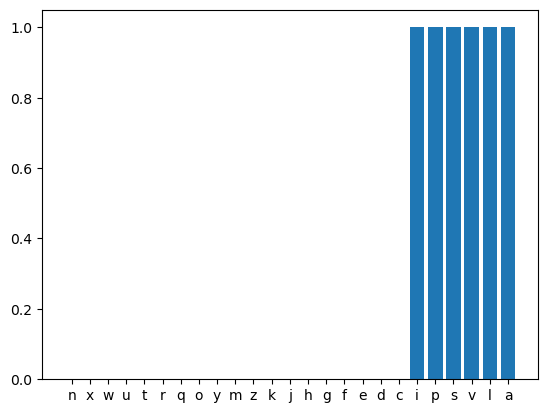

In [161]:
av_letters = np.delete(engletters,np.where(engletters==last_lett)[0])

w2_1 = w2_1[[is_pattern(aa,last_lett,found_patters[last_lett]) for aa in w2_1['word_sep']]]

base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [163]:
last_lett = 'a'
found_patters[last_lett] = '1000000000'
w2_1

,words,length,word_sep
143630,piliferous,10,"[p, i, l, i, f, e, r, o, u, s]"
216941,vasiferous,10,"[v, a, s, i, f, e, r, o, u, s]"


<BarContainer object of 25 artists>

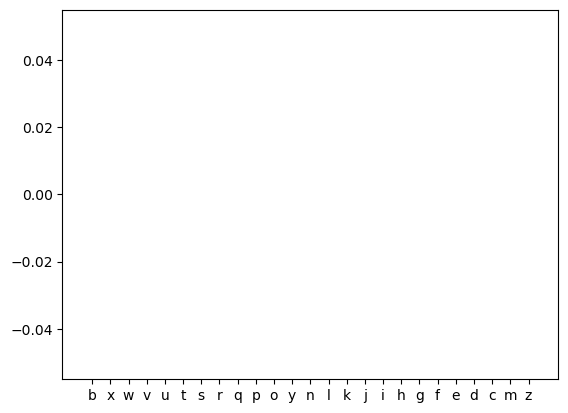

In [164]:
av_letters = np.delete(engletters,np.where(engletters==last_lett)[0])

w2_1 = w2_1[[is_pattern(aa,last_lett,found_patters[last_lett]) for aa in w2_1['word_sep']]]

base = list('0'*L)
probabilities = {}

for i in range(L+1):
    combs = combinations(range(L),i)
    for c in list(combs):
        b = ''.join(['1' if j in c else '0' for j in range(L)])
        probabilities[b] = 0

PT = []
H = []
cnt = 0
for l in av_letters:
    PT.append(probabilities.copy())
    for a in w2_1['word_sep']:
        pos = ''.join(['0' if aa!=l else '1' for aa in a])
        PT[cnt][pos]+=1/len(w2_1)
    H.append(sum(surprice(PT[cnt][x]) for x in PT[cnt]))
    cnt += 1

plt.bar(av_letters[np.argsort(H)],np.array(H)[np.argsort(H)])

In [168]:
import importlib as il
import with_NN as nn

ModuleNotFoundError: No module named 'tensorflow'

In [165]:
il.reload(nn)

NameError: name 'il' is not defined